Importing libraries and Inspection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Cleansing

In [5]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Feature Engineering

In [9]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2014-x)

In [10]:
def group_age(data):
    if data > 9 and data <= 24:
        return 'Gen Z / Zoomers (10-24)'
    elif data > 24 and data <= 40:
        return 'Gen Y / Millenials (25-40)'
    elif data > 40 and data <= 56:
        return 'Gen X (40-56)'
    elif data > 56:
        return 'Baby Boomers (57 and above)'
    return 'Unspecified'

df['Generation'] = df['Age'].apply(group_age)

In [11]:
df['Amount_Total'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [12]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [13]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'In Relationship' if x == 'Married' or x == 'Together' else 'Single')

In [16]:
df['Family_Size'] =  df.apply(lambda x: x['Children'] + 2 if x['Marital_Status'] == 'In Relationship' else x['Children'] + 1, axis=1)

In [17]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())

2012-01-08 00:00:00
2014-12-06 00:00:00


In [19]:
df['Date_Collected'] = pd.to_datetime('2014-12-07')
df['Customer_Enrolled'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days

In [20]:
df['Days_Active'] = df['Customer_Enrolled'] - df['Recency']

In [21]:
df.drop(columns=['ID', 'Year_Birth','Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Date_Collected', 'Customer_Enrolled'], axis=1, inplace=True)

In [22]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Generation,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,1,57,Baby Boomers (57 and above),1445,25,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,60,Baby Boomers (57 and above),25,6,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127,111,21,42,...,0,0,49,Gen X (40-56),665,21,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20,10,3,5,...,0,0,30,Gen Y / Millenials (25-40),43,8,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118,46,27,15,...,0,0,33,Gen Y / Millenials (25-40),376,19,1,3,0,228


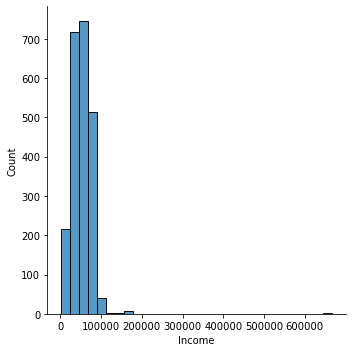

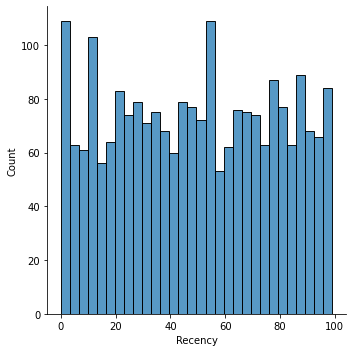

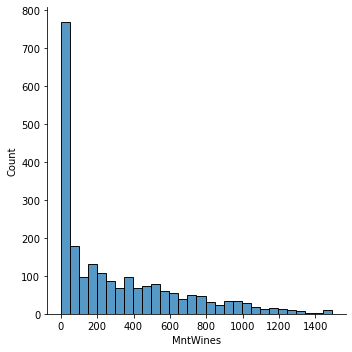

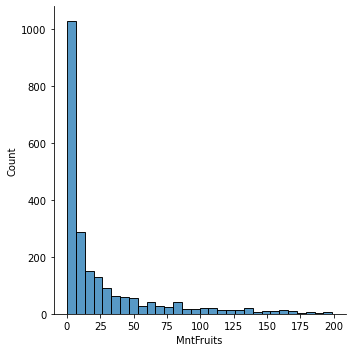

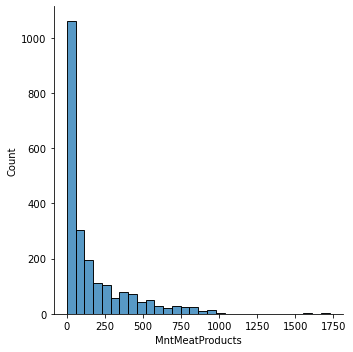

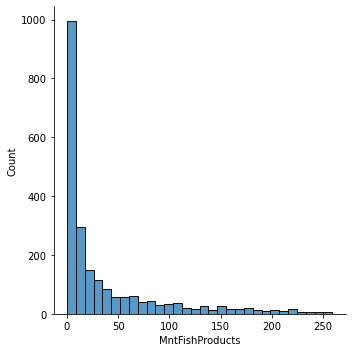

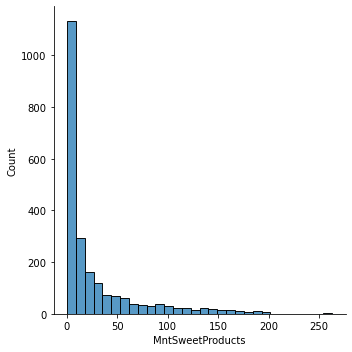

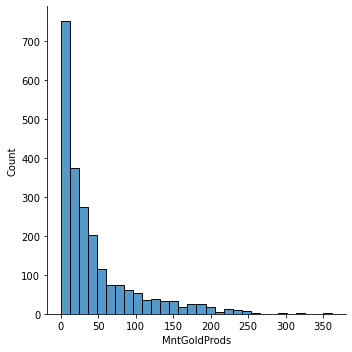

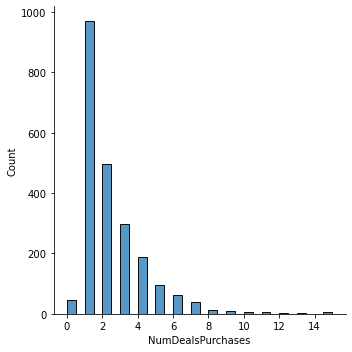

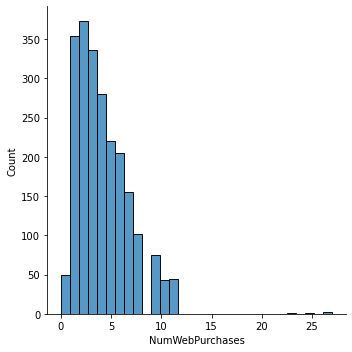

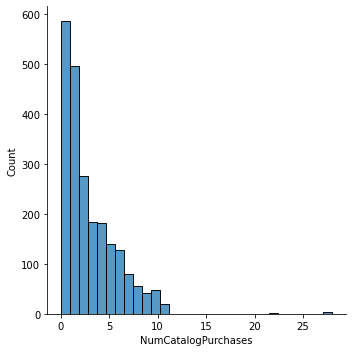

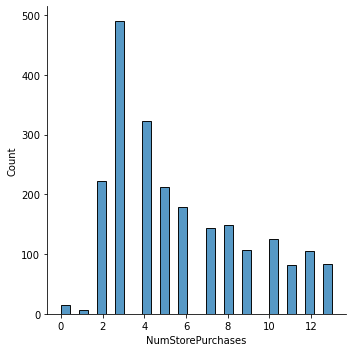

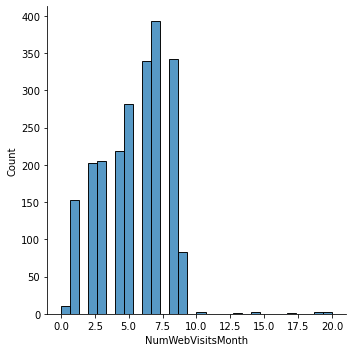

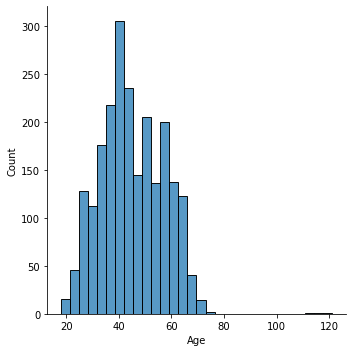

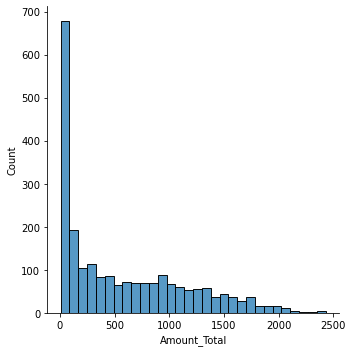

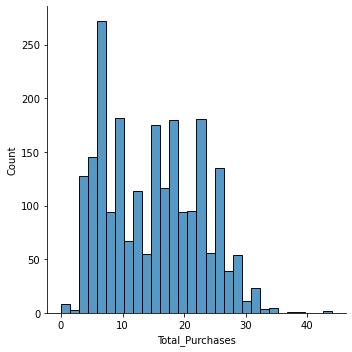

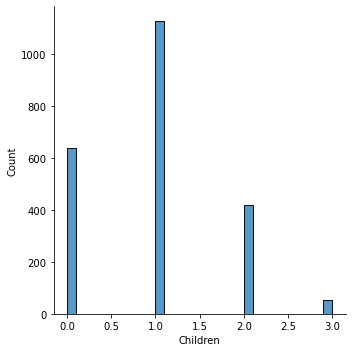

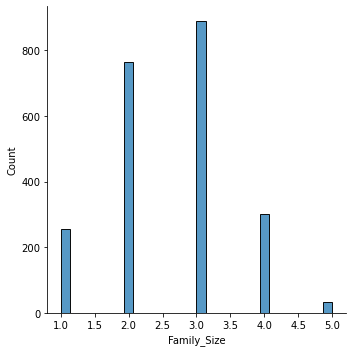

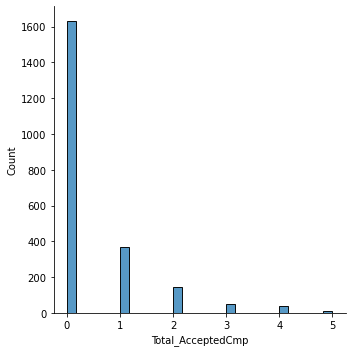

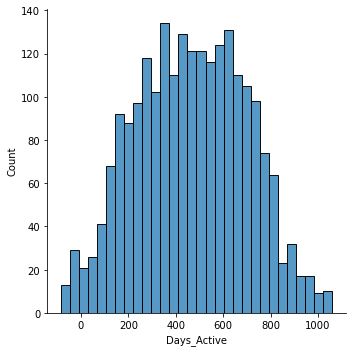

In [23]:
df_dist = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp', 'Days_Active']]

for i in df_dist.columns:
    sns.displot(x=i, bins=30, data=df)

Outliers : 'Income', 'MntMeatProducts', 'MntSweetProducts','NumWebPurchases','NumCatalogPurchases', 'Age'

In [24]:
df['Income'] = df['Income'].apply(lambda x: x if x < 120000 else np.nan)

In [25]:
df['MntMeatProducts'] = df['MntMeatProducts'].apply(lambda x: x if x < 1100 else np.nan)

In [26]:
df['NumWebPurchases'] = df['NumWebPurchases'].apply(lambda x: x if x < 15 else np.nan) 

In [27]:
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].apply(lambda x: x if x < 15 else np.nan)

In [28]:
df['Total_Purchases'] = df['Total_Purchases'].apply(lambda x: x if x < 40 else np.nan) 

In [29]:
df['Age'] = df['Age'].apply(lambda x: x if x < 80 else np.nan) 

In [30]:
df.isnull().any()

Education              False
Marital_Status         False
Income                  True
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts         True
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                     True
Generation             False
Amount_Total           False
Total_Purchases         True
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [31]:
df.shape

(2240, 30)

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().any()

Education              False
Marital_Status         False
Income                 False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Generation             False
Amount_Total           False
Total_Purchases        False
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [34]:
df.shape

(2223, 30)

In [35]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Generation,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546.0,172,88,88,...,0,1,57.0,Baby Boomers (57 and above),1445,25.0,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6.0,2,1,6,...,0,0,60.0,Baby Boomers (57 and above),25,6.0,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127.0,111,21,42,...,0,0,49.0,Gen X (40-56),665,21.0,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20.0,10,3,5,...,0,0,30.0,Gen Y / Millenials (25-40),43,8.0,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118.0,46,27,15,...,0,0,33.0,Gen Y / Millenials (25-40),376,19.0,1,3,0,228


In [36]:
df.to_csv('Cleaned.csv')